# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\willm\Desktop\launchcode\eda-checkpoint\bggdata2023\bgg_GameItem.csv')

df_theme = pd.read_csv(r'C:\Users\willm\Desktop\launchcode\eda-checkpoint\bggdata2023\bgg_Category.csv')

# First dataframe is the base information about the games in the dataset. Second dataframe is the themes, which will need to be joined to the 1st dataframe.

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [77]:
pd.set_option('display.max_columns', None)

# Set option to display all columns so I can see the full dataset.

In [78]:
# Sort the dataset by board game rank. We're most interested in the top rated board games. 
# Games which have very little impact on the industry will not receive a rank, as they need a minimum number of reviews in order to be ranked.
# However we will not remove the unranked games, as it is still valuable data about the state of the industry as a whole.
df = df.sort_values('rank', ascending=True)

# display(df)

In [79]:
display(df.describe())

,bgg_id,year,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,cooperative,compilation,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
count,113904.000000,104219.000000,111966.000000,108448.000000,111966.000000,108448.000000,111966.000000,108448.000000,90641.000000,1126.000000,91342.000000,9.134200e+04,6354.0,915.0,24479.000000,86182.000000,86182.000000,68497.000000,24934.000000,48290.000000,854.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,156348.970185,2001.765551,2.020703,6.908306,2.025892,6.887328,2.061403,6.861168,9.517437,9.863855,50.787622,1.302572e+03,1.0,1.0,12236.256506,264.600357,6.147009,1.511145,5.677975,1.902059,2.113773,NaN,NaN,NaN,NaN,NaN,NaN
std,124025.337022,66.493704,0.817943,49.819444,0.823590,49.807438,0.862756,49.809422,7.471185,2.824199,604.980910,2.370319e+05,0.0,0.0,7064.023882,2149.905056,1.604784,0.625139,0.357619,0.830024,1.191279,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-3500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.045455,1.000000,1.000000e+00,1.0,1.0,1.000000,1.000000,1.000000,0.000500,3.624890,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,32767.750000,1998.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,8.000000,7.987899,15.000000,2.000000e+01,1.0,1.0,6122.500000,2.000000,5.214290,1.176210,5.509562,1.000000,1.013607,NaN,NaN,NaN,NaN,NaN,NaN
50%,140110.500000,2011.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,10.000000,30.000000,3.500000e+01,1.0,1.0,12233.000000,7.000000,6.190590,1.465140,5.541855,2.000000,1.778424,NaN,NaN,NaN,NaN,NaN,NaN
75%,268252.500000,2018.000000,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.973319,60.000000,6.000000e+01,1.0,1.0,18361.000000,41.000000,7.070290,1.776240,5.662987,2.414025,3.063077,NaN,NaN,NaN,NaN,NaN,NaN
max,392146.000000,2026.000000,50.000000,11299.000000,50.000000,11299.000000,50.000000,11299.000000,2017.000000,20.541667,157680.000000,6.307200e+07,1.0,1.0,24481.000000,119186.000000,10.000000,4.500000,8.423300,5.000000,4.983333,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
display(df_theme)
display(df_theme.describe())

,bgg_id,name
0,1001,Political
1,1002,Card Game
2,1008,Nautical
3,1009,Abstract Strategy
4,1010,Fantasy
...,...,...
79,2650,Aviation / Flight
80,2687,Fan Expansion
81,2710,Post-Napoleonic
82,2725,Pike and Shot


,bgg_id
count,84.000000
mean,1184.130952
std,431.313622
min,1001.000000
25%,1029.750000
50%,1051.500000
75%,1094.750000
max,2726.000000


In [81]:
# Now we will replace the values from the bgg_Category dataset with the values from the 'category' column. This will allow us to more easily parse the meaning of each category.

theme_map = df_theme.set_index('bgg_id')['name'].to_dict()

def map_id_to_theme(theme_ids):
    if pd.isna(theme_ids):
        return theme_ids
    ids = theme_ids.split(',')
    names = [theme_map.get(int(cat_id.strip()), 'Unknown') for cat_id in ids]
    return names

df['category'] = df['category'].apply(map_id_to_theme)

In [82]:
display(df[['name', 'category']])

,name,category
76224,Brass: Birmingham,"[Economic, Industry / Manufacturing, Post-Napo..."
62813,Pandemic Legacy: Season 1,"[Environmental, Medical]"
66014,Gloomhaven,"[Adventure, Exploration, Fantasy, Fighting, Mi..."
102831,Ark Nova,"[Animals, Economic, Environmental]"
78094,Twilight Imperium: Fourth Edition,"[Civilization, Economic, Exploration, Negotiat..."
...,...,...
113899,Champions!,[Party Game]
113900,Leitin að stjörnunni,"[Children's Game, Movies / TV / Radio theme, P..."
113901,The String Railway Collection,"[Territory Building, Trains]"
113902,SpellBook,[Fantasy]


In [83]:
# We'll also create a dataframe which filters the unranked games, so we can examine just the most impactful games.
df_filtered = df[df['rank'].notna()]
df_filtered = df_filtered.sort_values('rank', ascending=True)

display(df_filtered)

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
76224,224517,Brass: Birmingham,2018.0,5497,"32887,32943,6","70571,70568,38179","21765,3475,25074,21608,11043,34522,31071,8832,...",2.0,4.0,2.0,4.0,3.0,4.0,14.0,13.825758,60.0,120.0,"[Economic, Industry / Manufacturing, Post-Napo...","2040,2902,2904,2900,2081,3100,2849,2826,2897",NaN,NaN,NaN,"17519,65191,14759,8374,22135,77349,70948,26397...",28720,NaN,1.0,38651.0,8.61232,1.42368,8.42330,3.8955,1.023810,NaN,NaN,NaN,NaN,NaN,NaN
62813,161936,Pandemic Legacy: Season 1,2015.0,"5496,5497","442,378",14057,"538,15889,2366,5657,8820,1391,15983,8291,5812,...",2.0,4.0,2.0,4.0,4.0,4.0,13.0,11.760000,60.0,60.0,"[Environmental, Medical]","2001,2023,2040,2824,2078,2822,2004,3100,2008,2015",1.0,NaN,NaN,"64952,65191,3430,24281,25404,61854,72224,78680...",30549,NaN,2.0,50631.0,8.53562,1.60680,8.38972,2.8318,4.085938,NaN,NaN,NaN,NaN,NaN,NaN
66014,174430,Gloomhaven,2017.0,"5496,5497",69802,"77084,78961,84269","27425,4304,46179,3475,22380,15605,40478,8820,1...",1.0,4.0,1.0,4.0,3.0,3.0,14.0,13.602113,60.0,120.0,"[Adventure, Exploration, Fantasy, Fighting, Mi...","2689,2839,2018,2857,2893,2023,2854,3004,2676,2...",1.0,NaN,NaN,"59218,25158,65191,66335,68438,7005,5615,8374,7...",NaN,"295770,291457",3.0,58418.0,8.62311,1.75165,8.38865,3.8959,4.166667,NaN,NaN,NaN,NaN,NaN,NaN
102831,342942,Ark Nova,2021.0,5497,138517,"138547,11462,12484,11797","22380,30958,21608,10768,12540,8820,42325,17179...",1.0,4.0,1.0,3.0,2.0,2.0,14.0,12.442623,90.0,150.0,"[Animals, Economic, Environmental]","2875,2040,2026,2902,2914,2041,2004,2819,3100,2...",NaN,NaN,NaN,"67874,70360,73596,76649,5666,68335,66167,76846",NaN,NaN,4.0,31052.0,8.53405,1.38518,8.30236,3.7249,3.712121,NaN,NaN,NaN,NaN,NaN,NaN
78094,233078,Twilight Imperium: Fourth Edition,2017.0,"5496,5497","96049,6651,21",11988,"17,23043,3475,157,15889,2973,4617,15605,18852,...",3.0,6.0,3.0,6.0,6.0,6.0,14.0,14.135135,240.0,480.0,"[Civilization, Economic, Exploration, Negotiat...","2838,2080,2021,2072,2843,2676,2026,2914,2886,2...",NaN,NaN,NaN,"67874,64949,25158,29,12210,78680",12493,NaN,5.0,20922.0,8.61973,1.61439,8.24243,4.3080,4.093750,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,15549,Roulette,1796.0,5498,4747,NaN,"171,45666,9729,2620,690,5521,5768,8421,1307,53...",2.0,6.0,2.0,6.0,2.0,6.0,8.0,NaN,1.0,1.0,[Number],2014,NaN,NaN,NaN,11505,NaN,NaN,24472.0,858.0,3.38946,1.97547,4.82767,1.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101352,338067,6: Siege – The Board Game,2023.0,NaN,78518,"12402,24858,4579",33579,2.0,4.0,2.0,4.0,2.0,4.0,14.0,NaN,60.0,60.0,"[Miniatures, Modern Warfare, Spies/Secret Agen...","2834,2014,2072,2676,2837,2975,2965,2831,2822,2...",NaN,NaN,NaN,"22184,80369,25158,8374,73596",NaN,NaN,24476.0,444.0,2.29366,2.88874,5.00563,3.4545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5598,6424,Pick Up Sticks,1850.0,4665,3,57721,"171,9607,2594,389,225,1935,5314,2632,2401,1738...",2.0,6.0,2.0,6.0,3.0,3.0,4.0,4.833333,10.0,30.0,"[Action / Dexterity, Children's Game, Party Game]","2989,2661,2004,2686",NaN,NaN,NaN,"65591,18435,68769,6363,21540,5863,5860",NaN,NaN,24479.0,2674.0,4.32770,1.62629,4.78785,1.0419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4371,5050,The Worst-Case Scenario Survival Game,2001.0,5498,3,NaN,254,2.0,10.0,2.0,10.0,2.0,10.0,8.0,NaN,20.0,40.0,[Trivia],2072,NaN,NaN,NaN,10250,NaN,NaN,24480.0,632.0,3.34636,1.84974,4.97080,1.1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [130]:
df_exploded = df.explode('category')

df_grouped = df_exploded.groupby(['year','category']).size().reset_index(name='count')

df_filtered_exploded = df_filtered.explode('category')

df_filtered_grouped = df_filtered_exploded.groupby(['year','category']).size().reset_index(name='count')

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


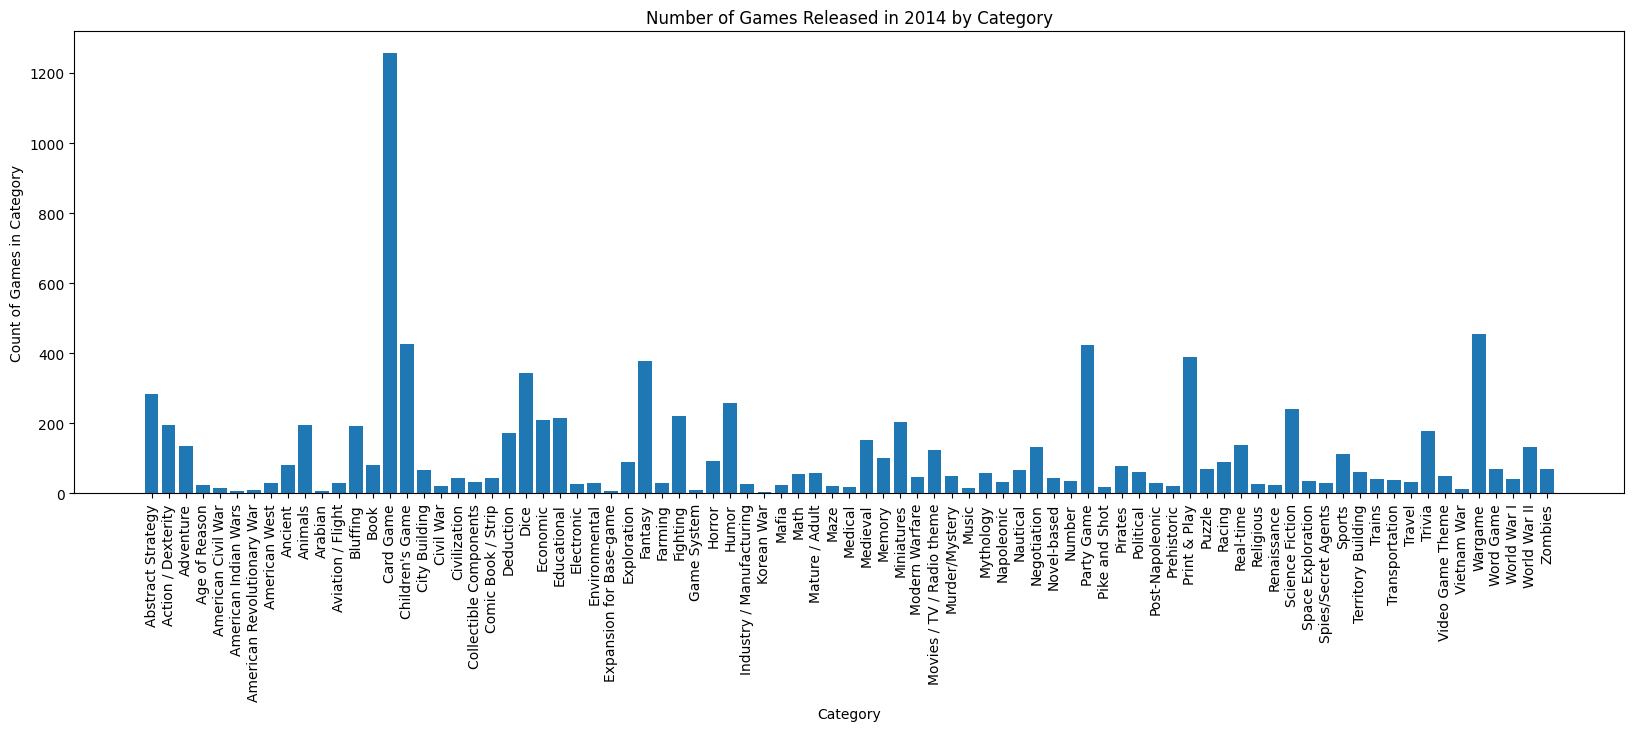

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


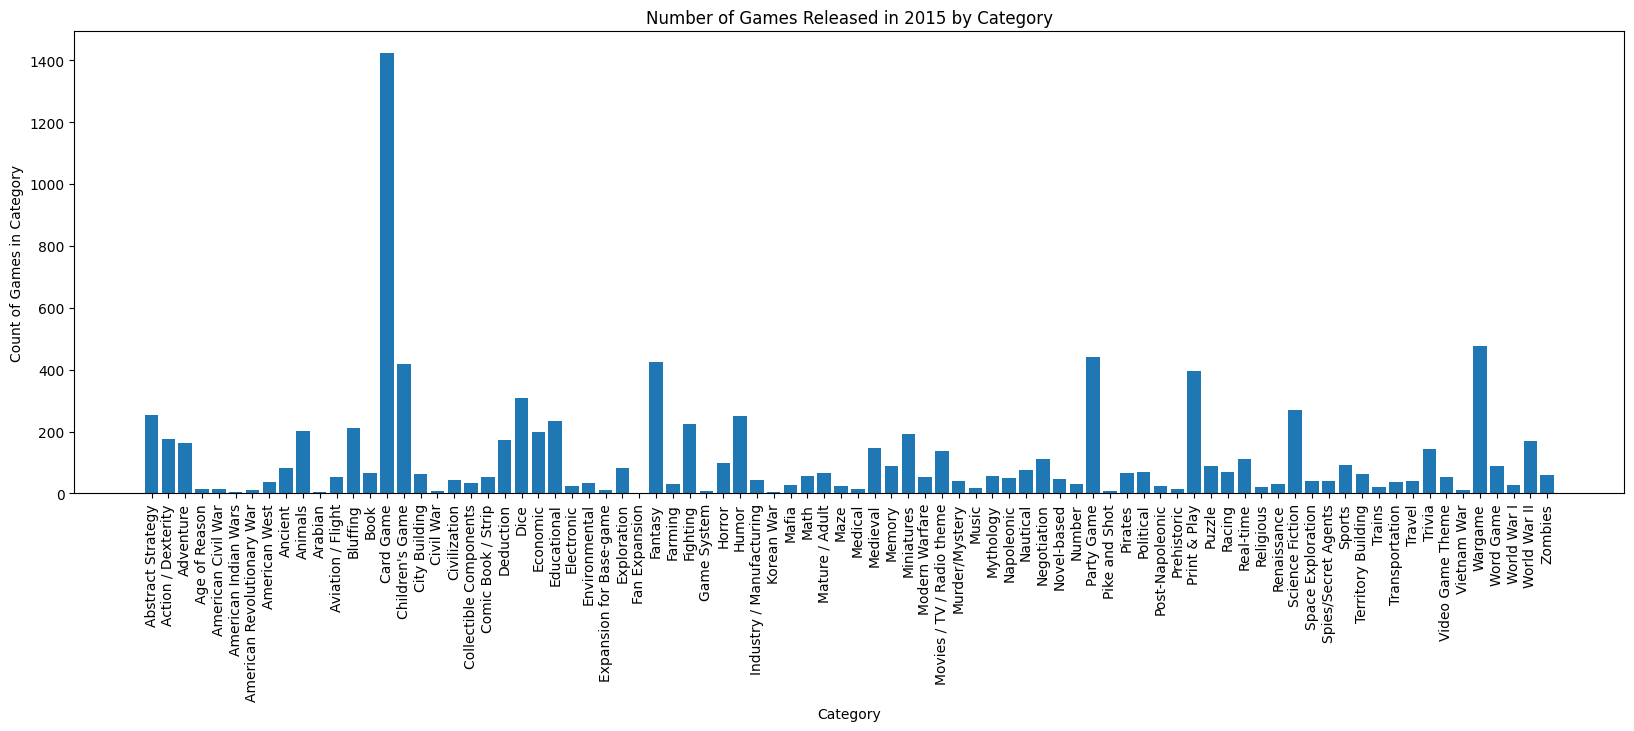

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


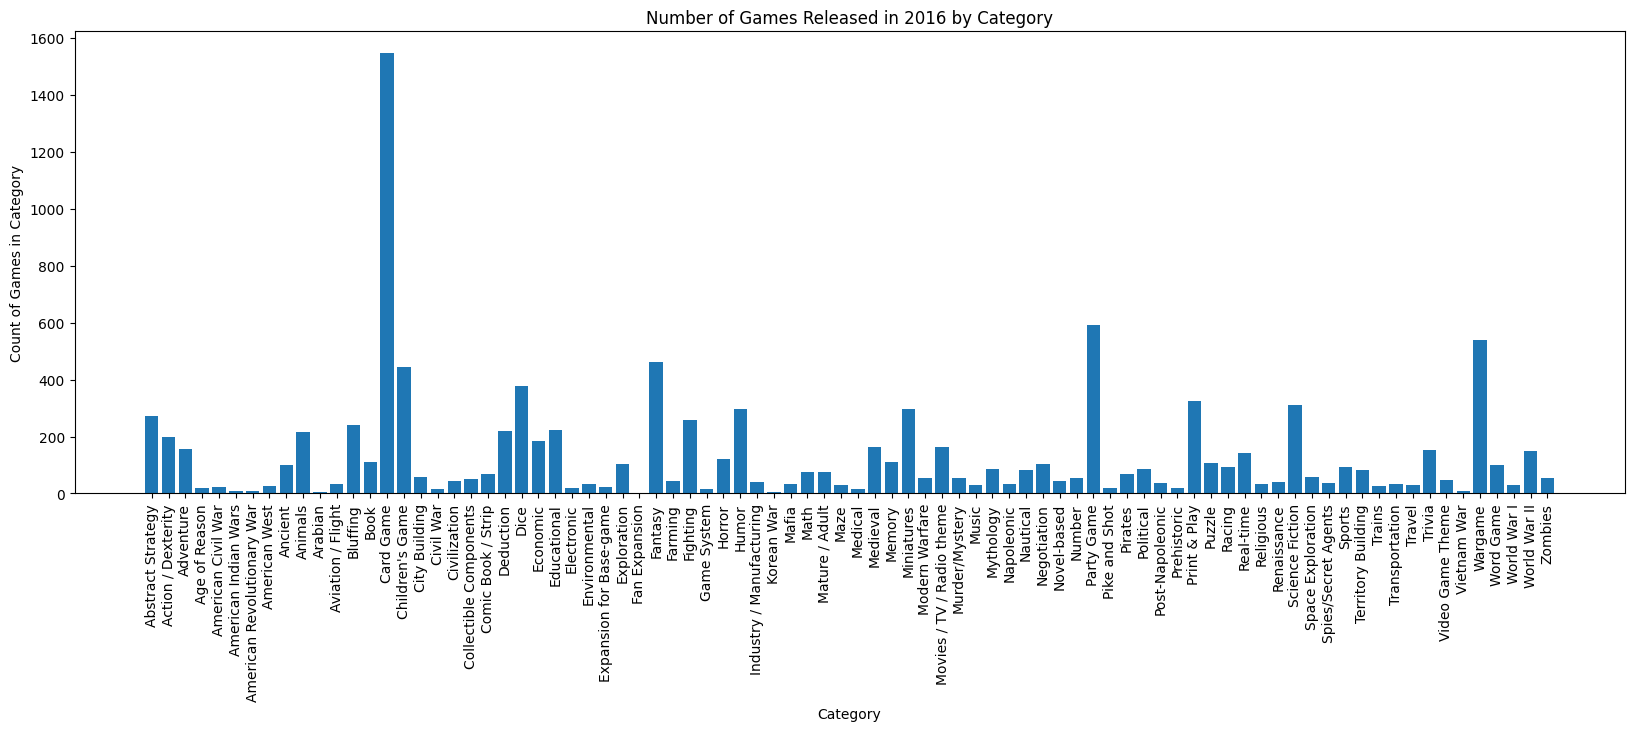

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


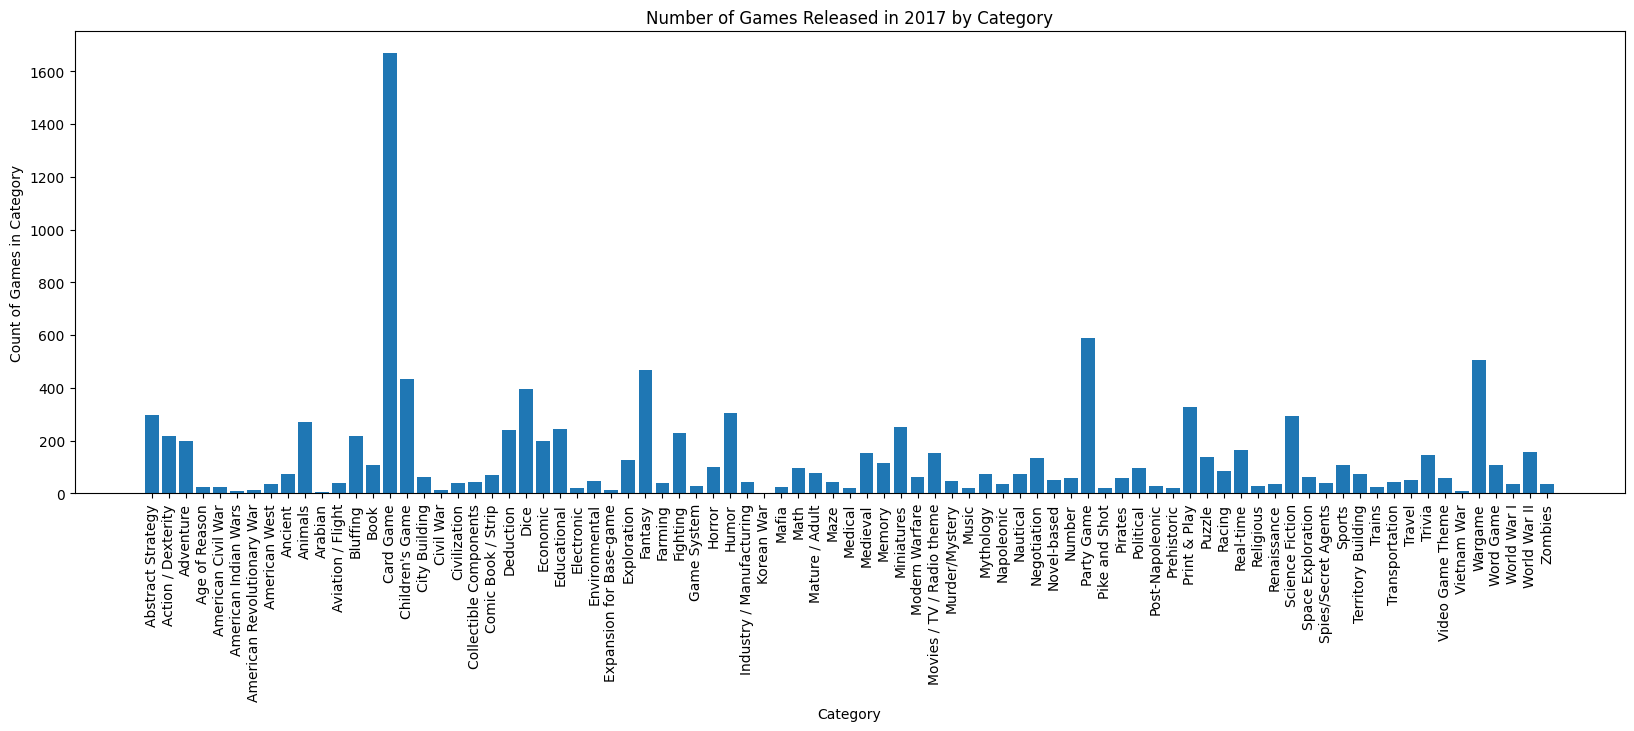

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


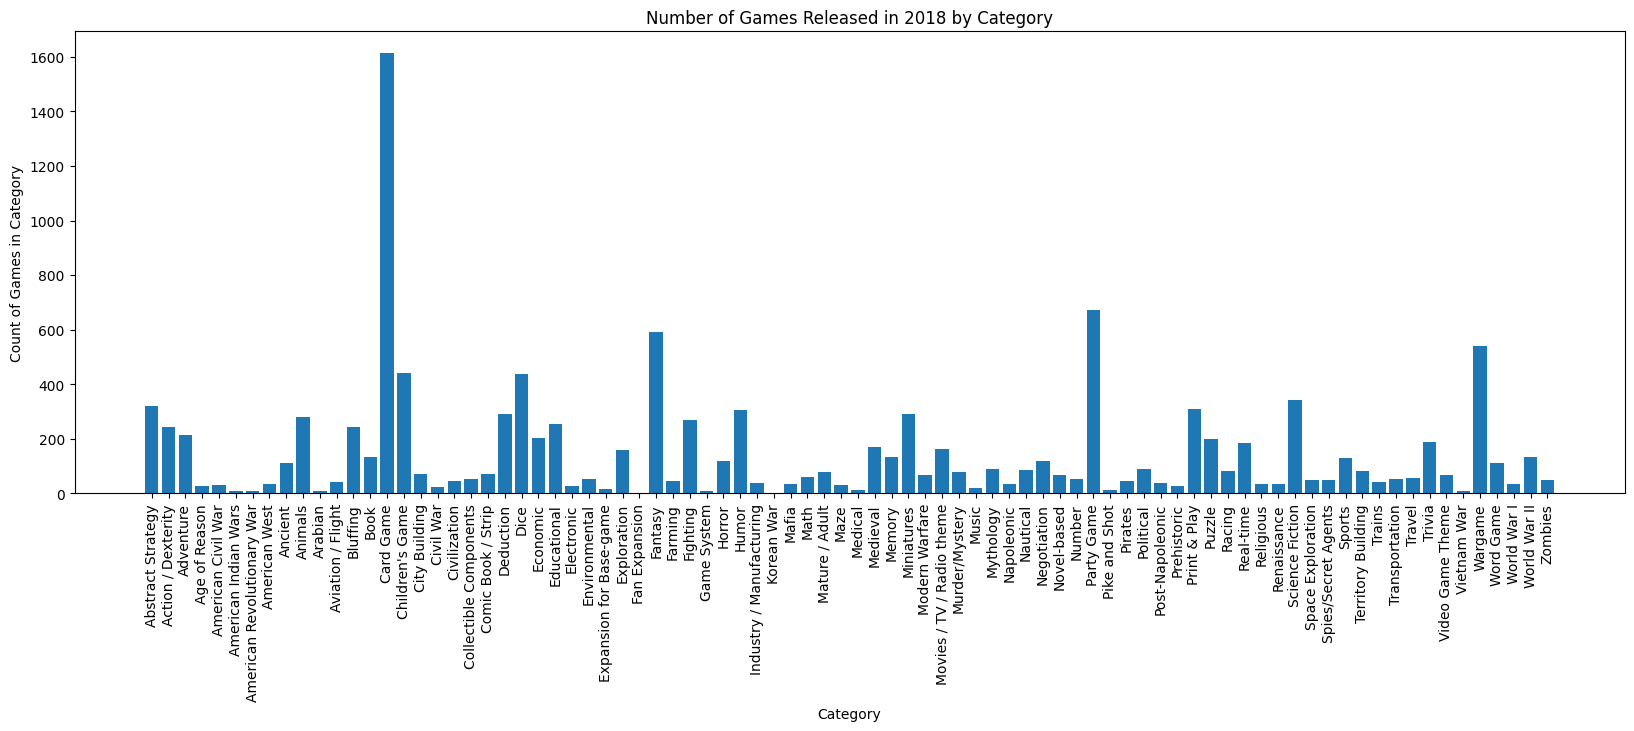

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


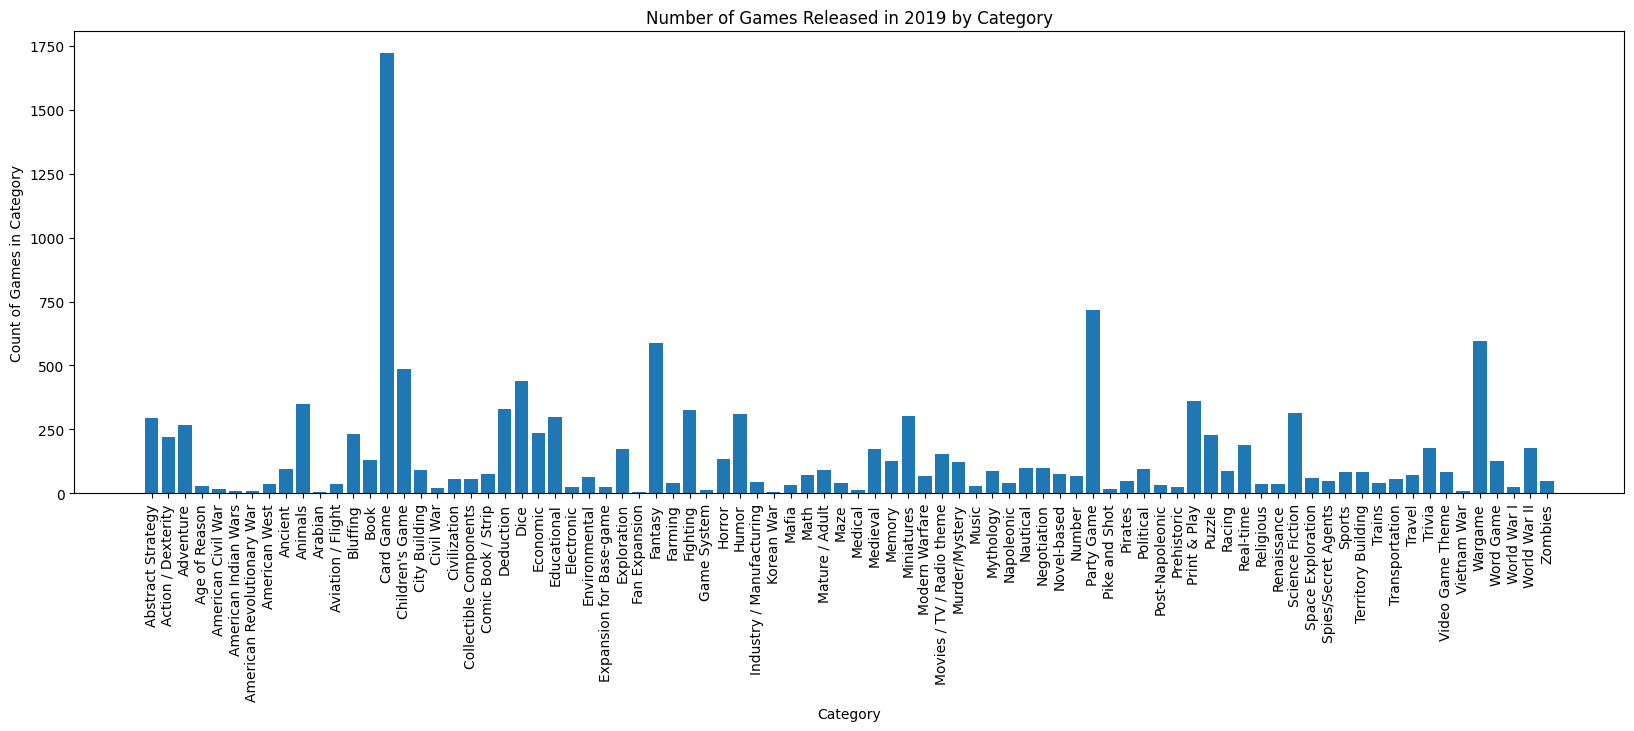

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


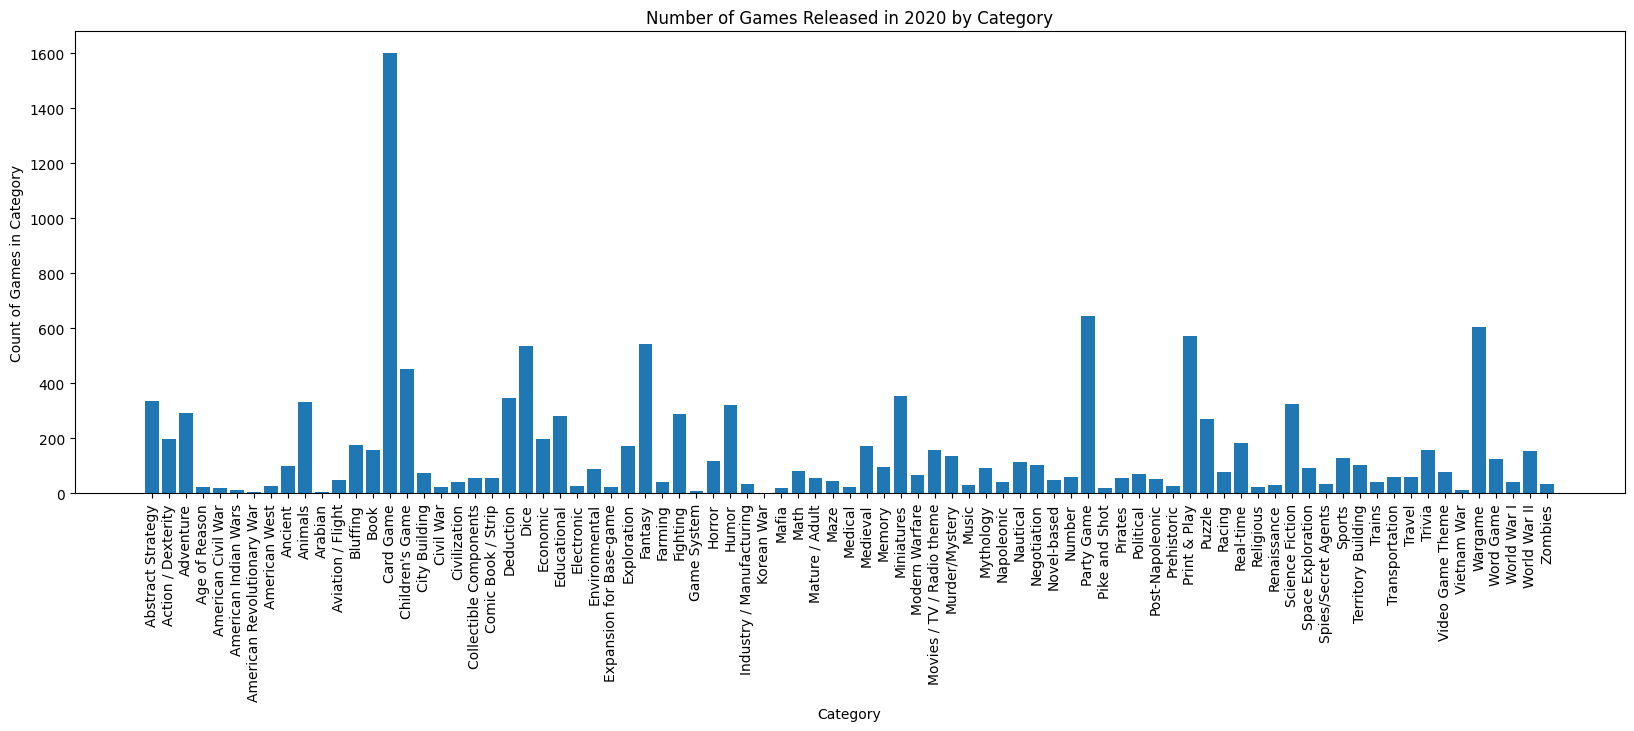

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


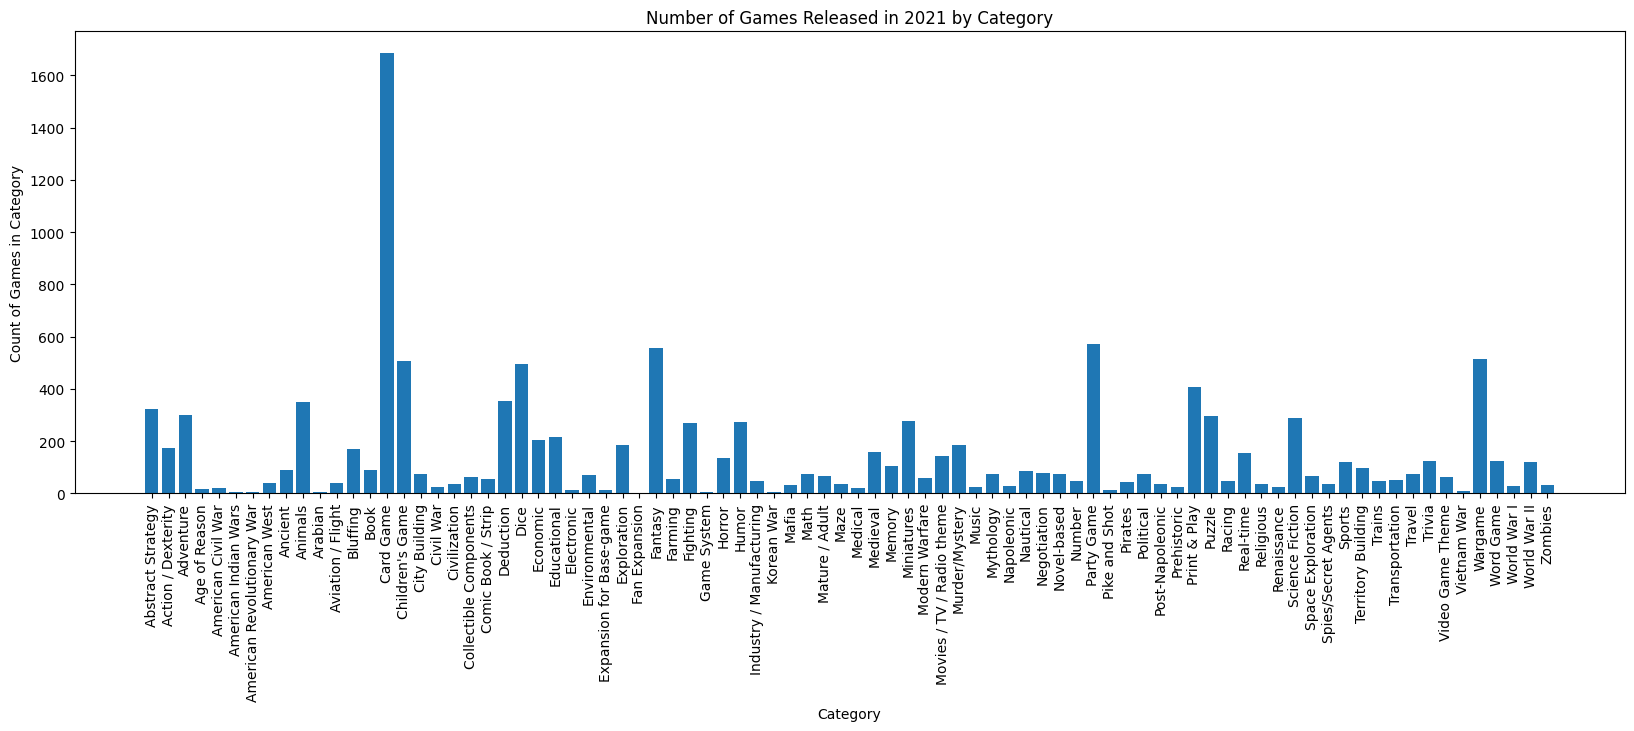

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


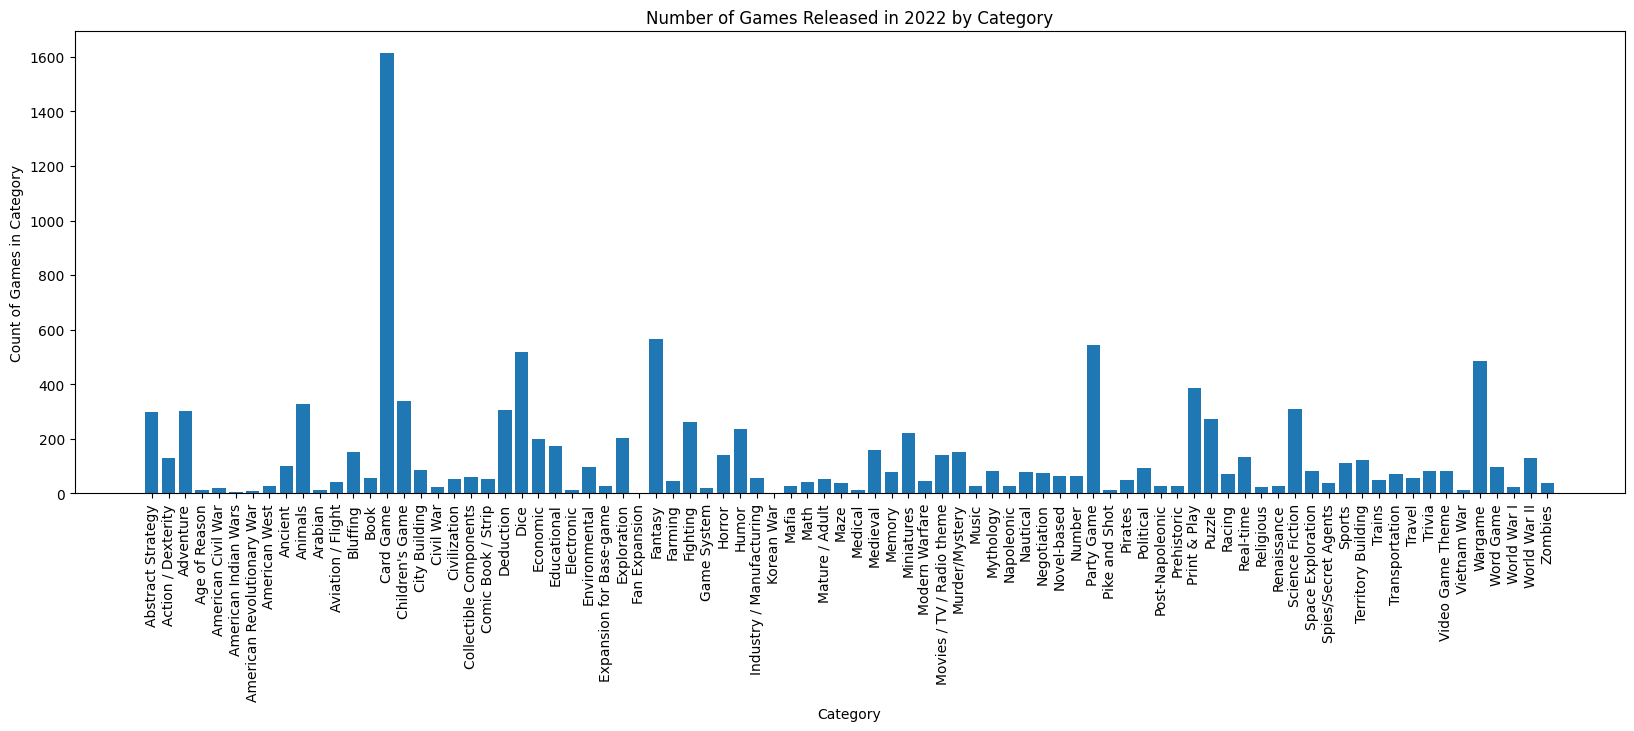

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


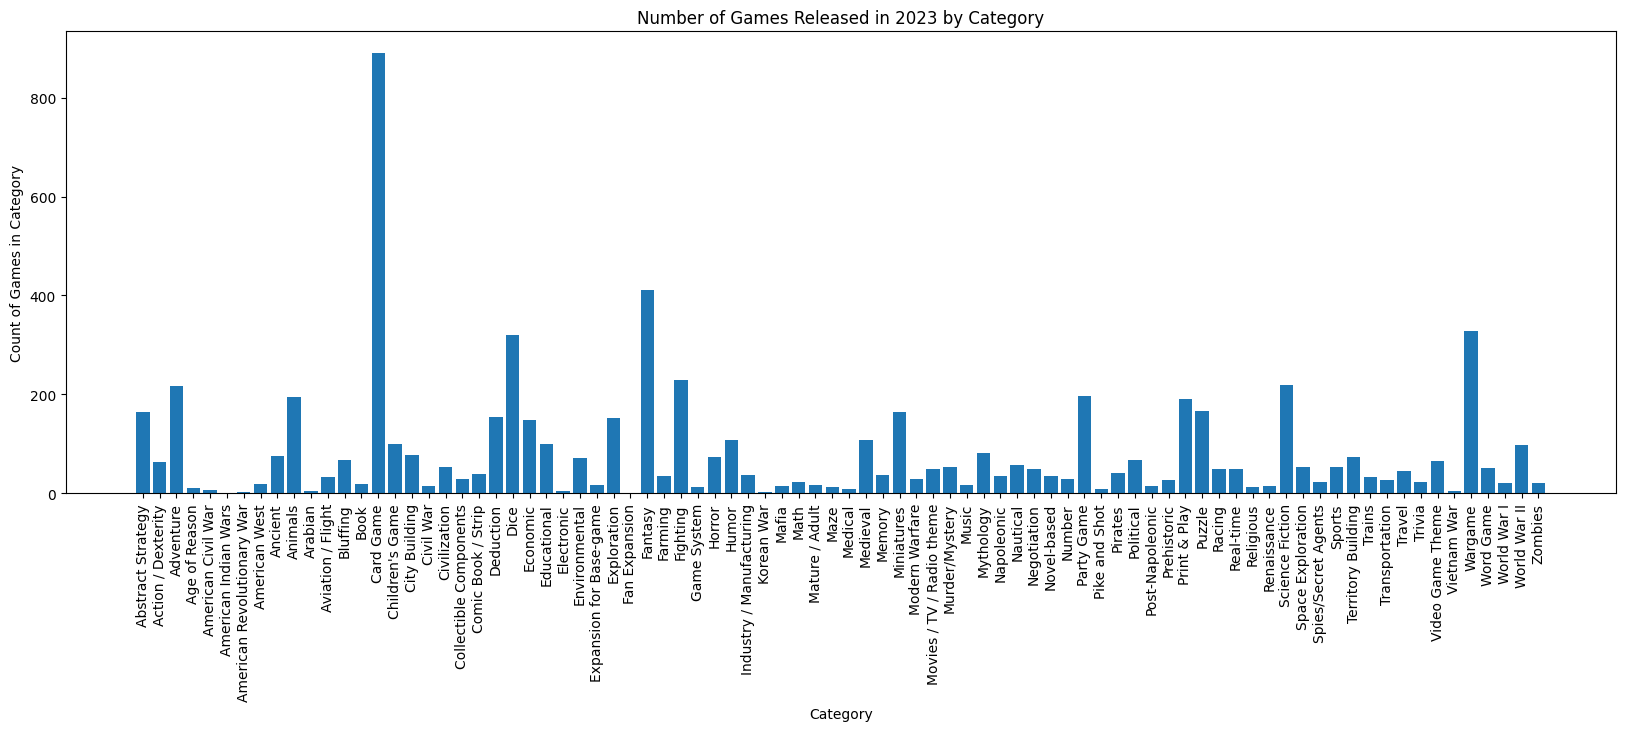

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\1312097105.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


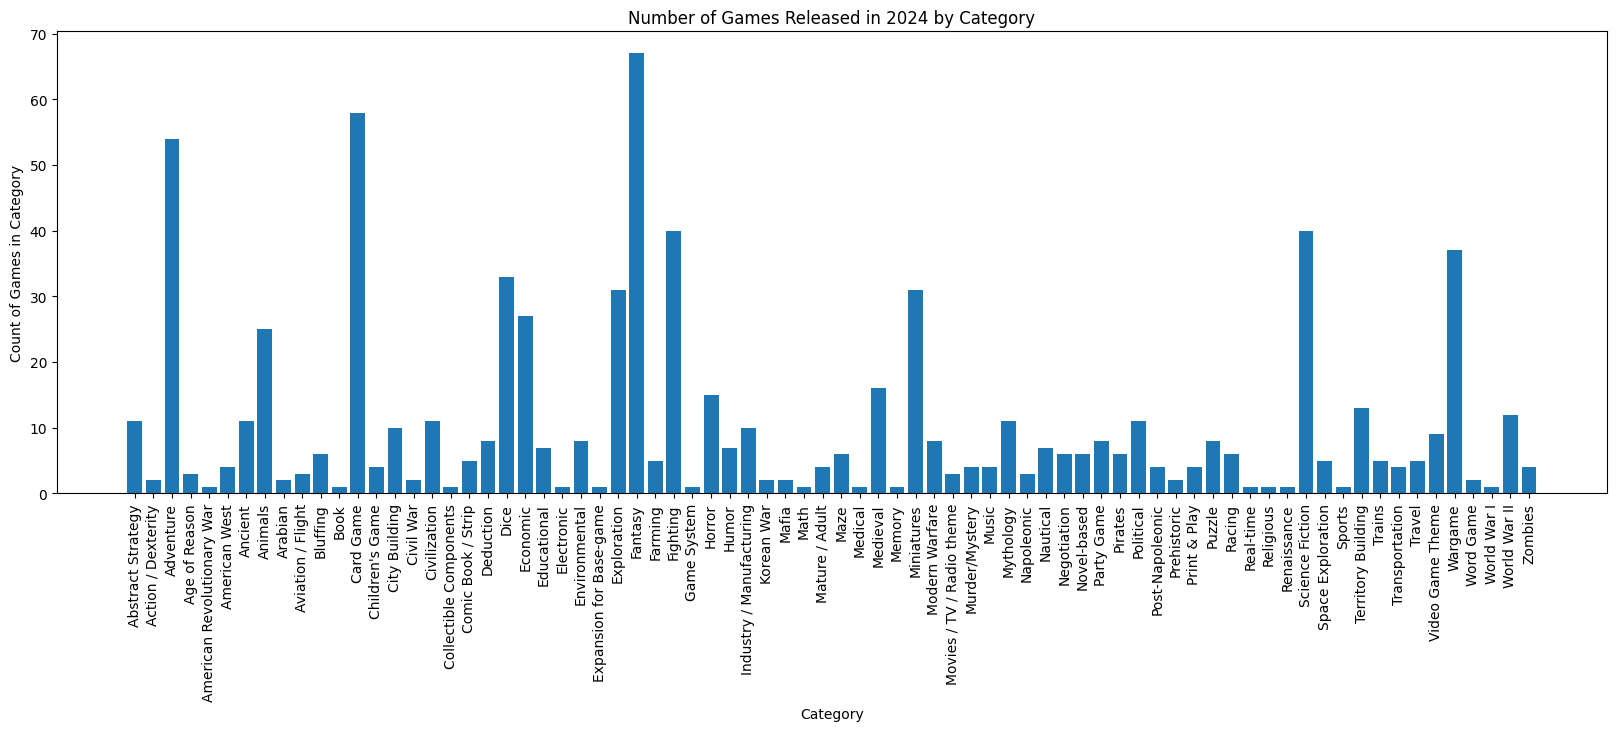

In [131]:
current_year = 2024
last_24_years = range(current_year - 10, current_year+1)

for year in last_24_years:
    df_year = df_grouped[df_grouped['year'] == year]

    fig, ax = plt.subplots(figsize=(20,6))

    ax.bar(df_year['category'], df_year['count'])
    ax.set_xticklabels(df_year['category'], rotation=90, ha='center')
    ax.set_xlabel('Category')
    ax.set_ylabel('Count of Games in Category')
    ax.set_title(f'Number of Games Released in {year} by Category')
    plt.show()

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


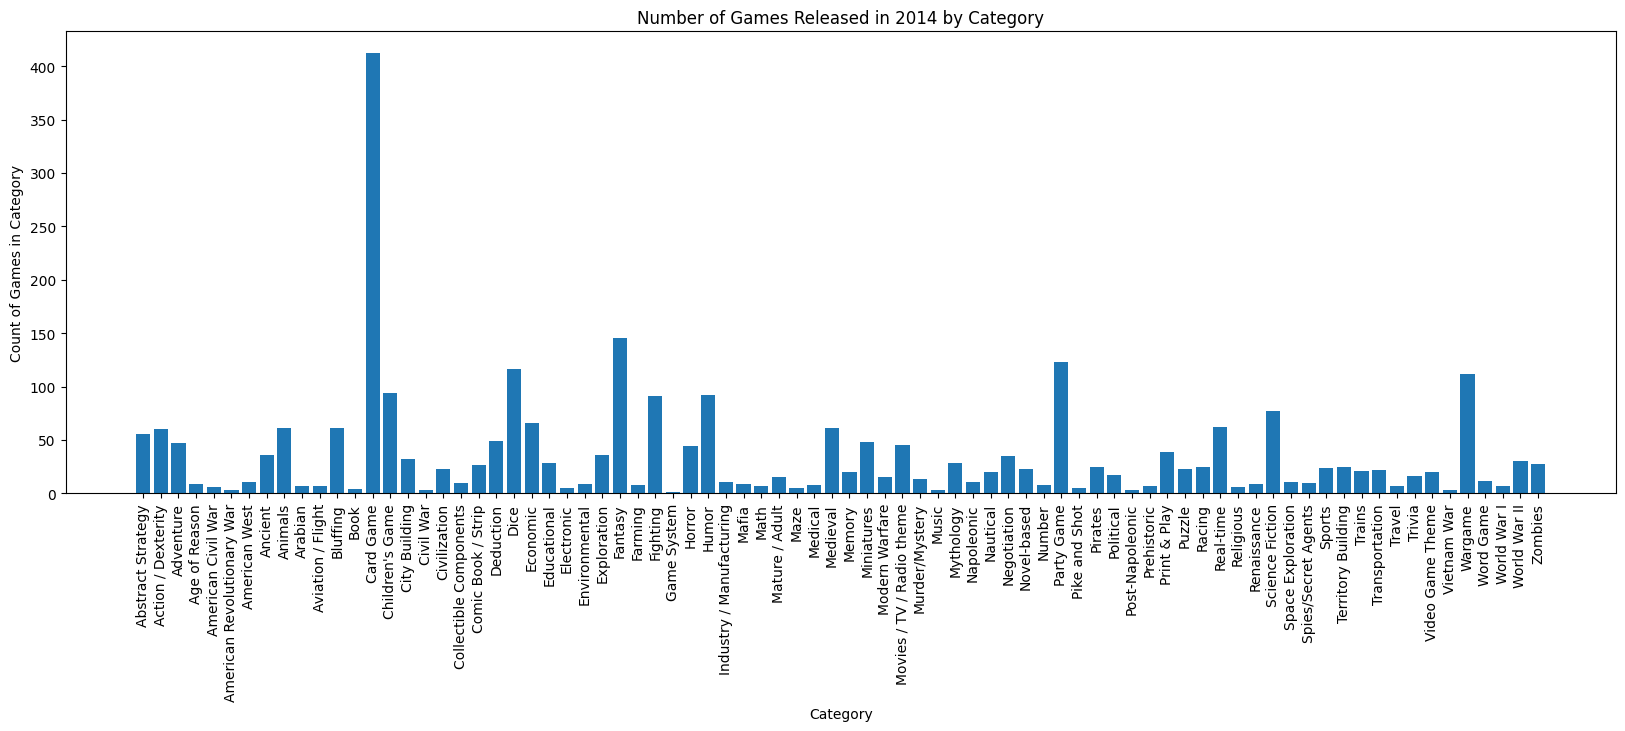

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


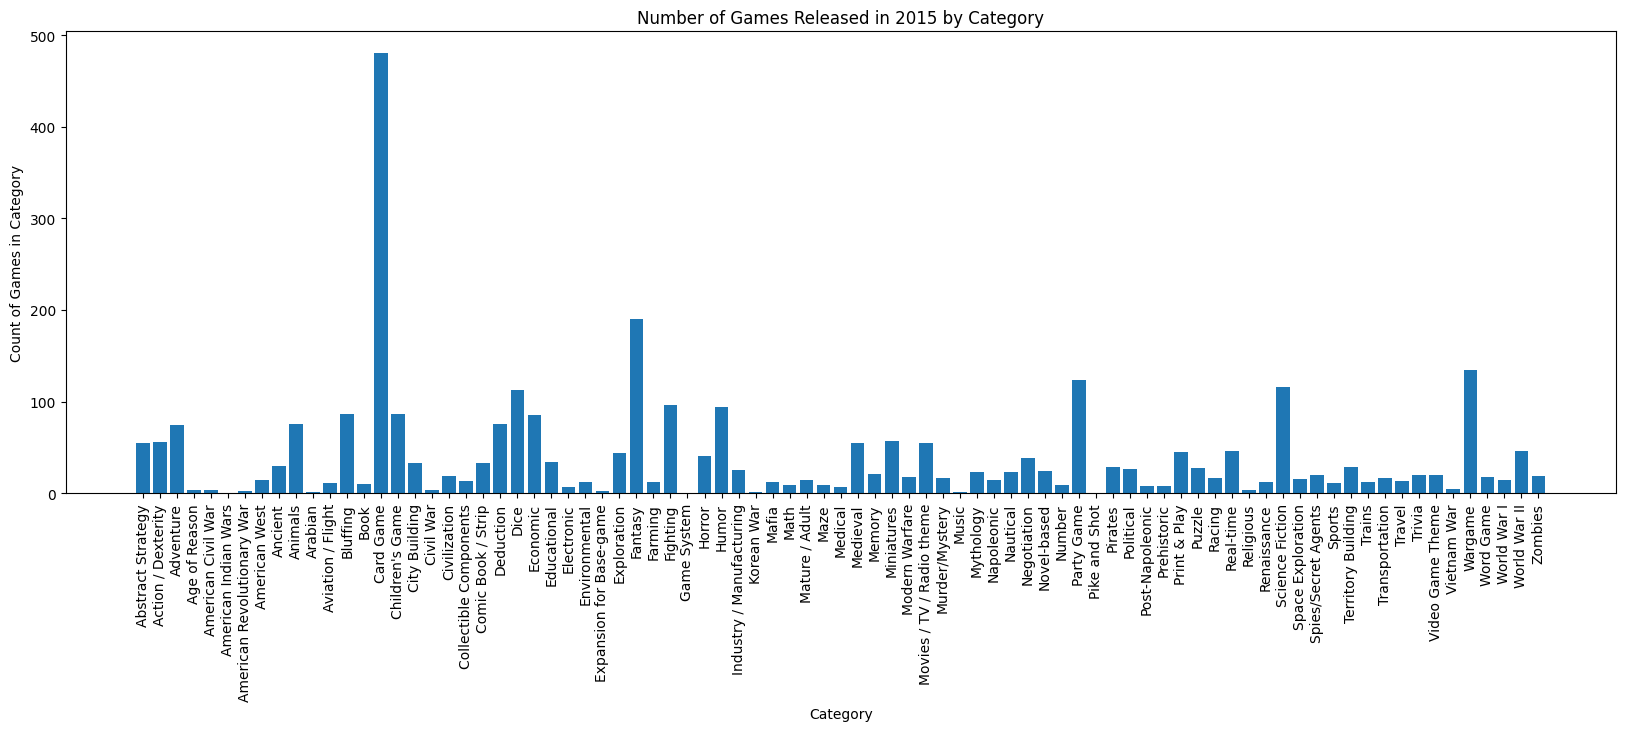

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


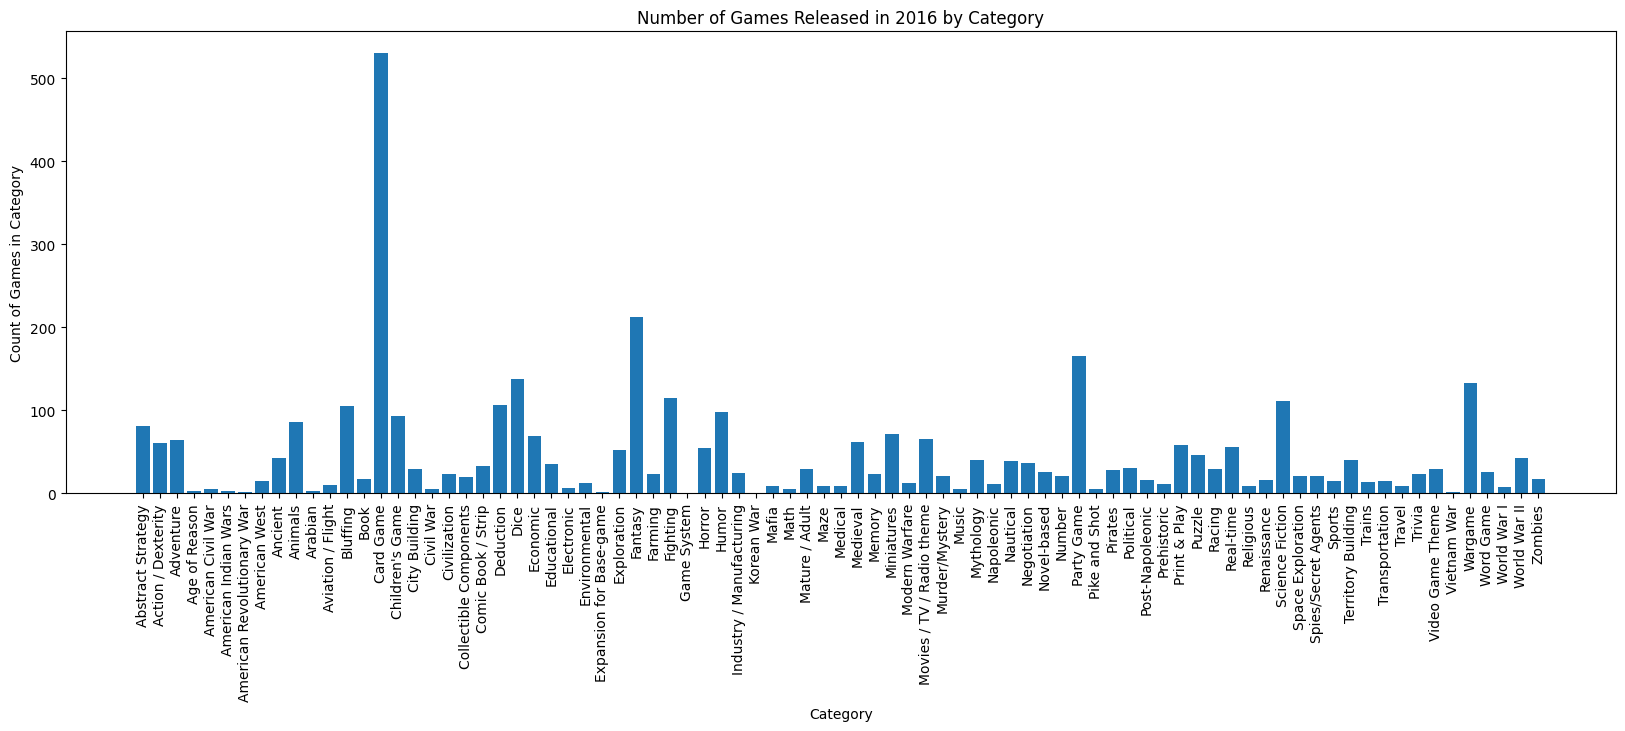

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


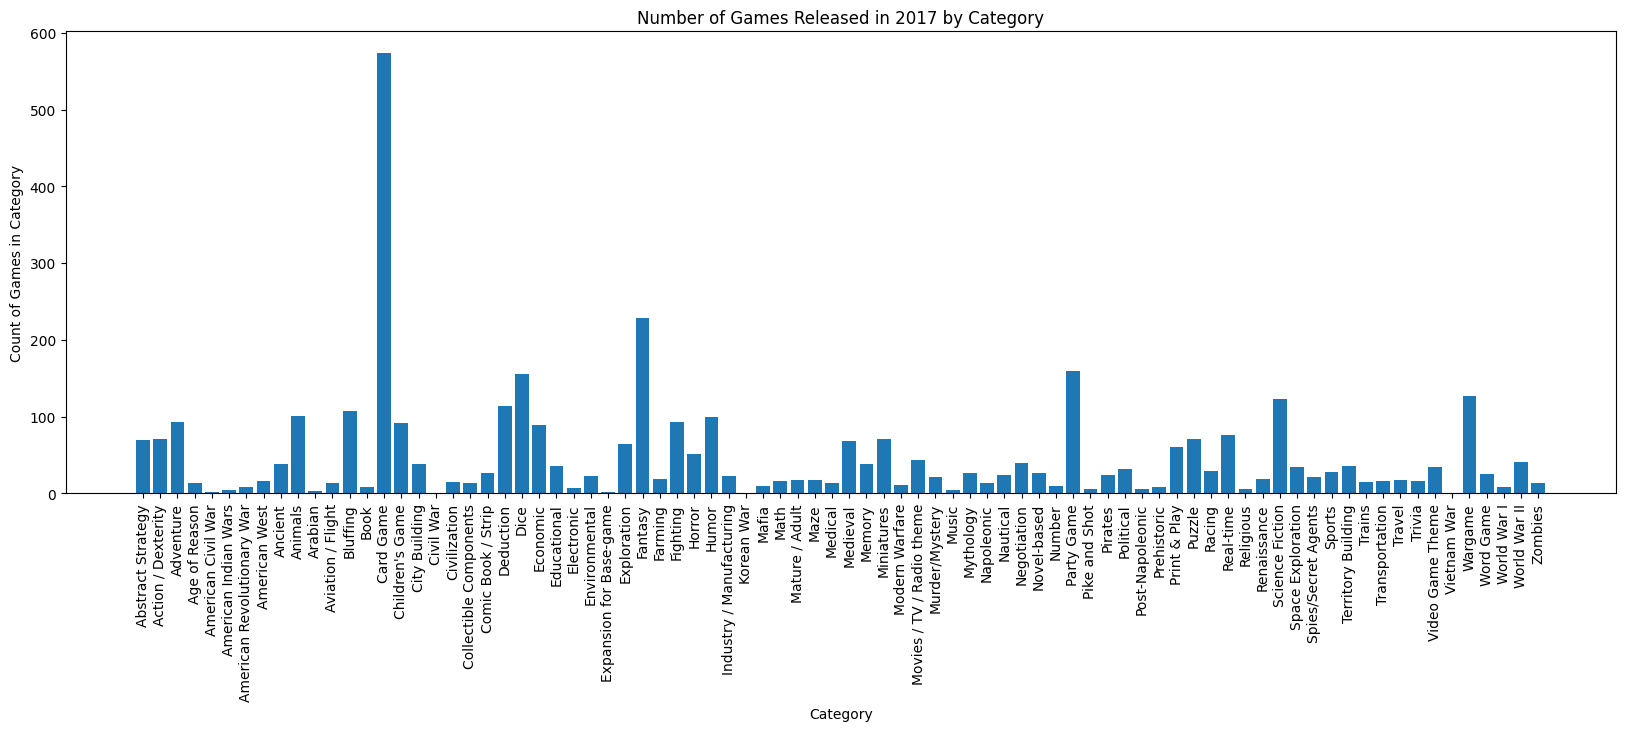

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


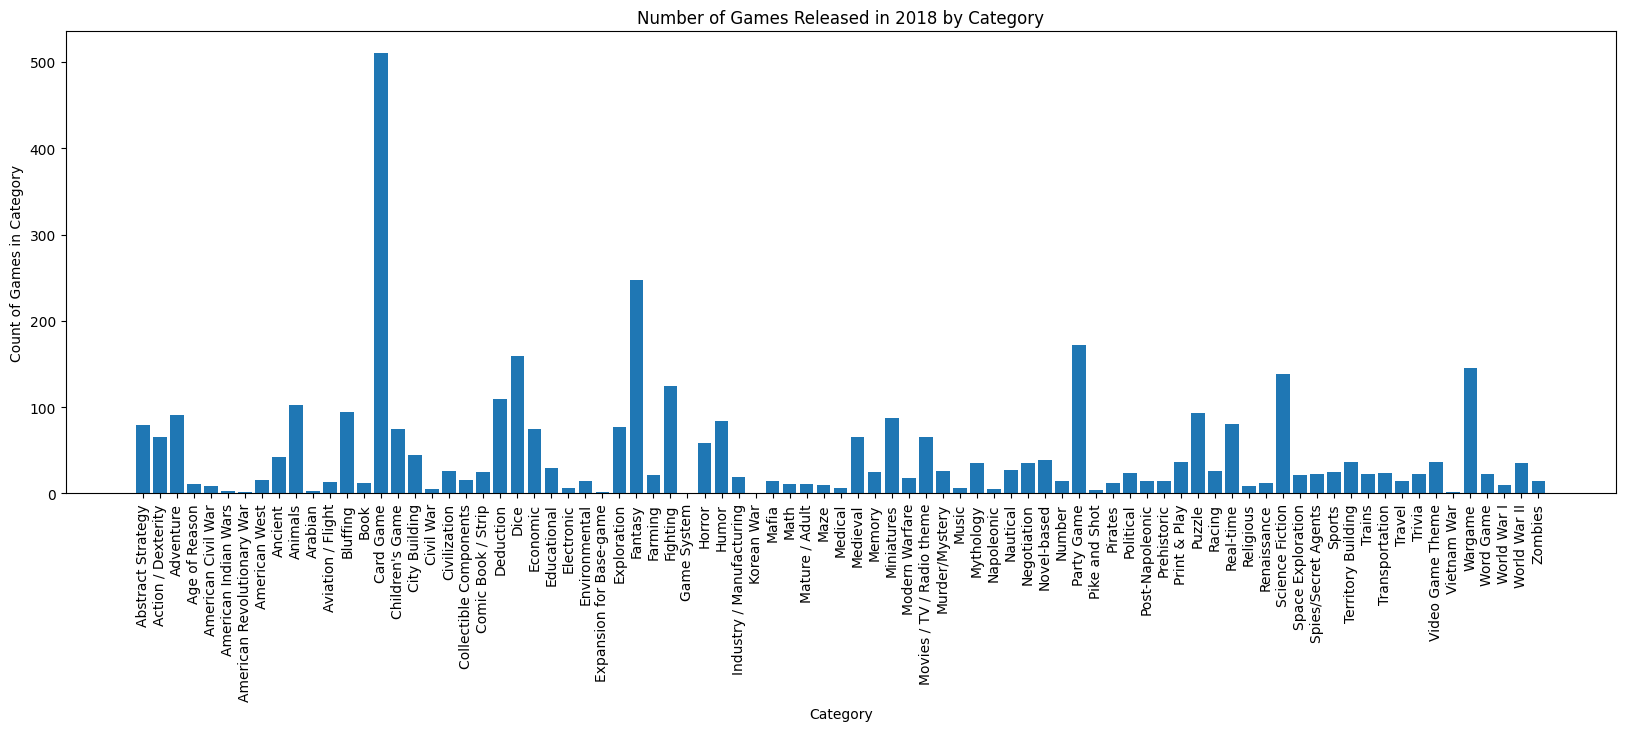

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


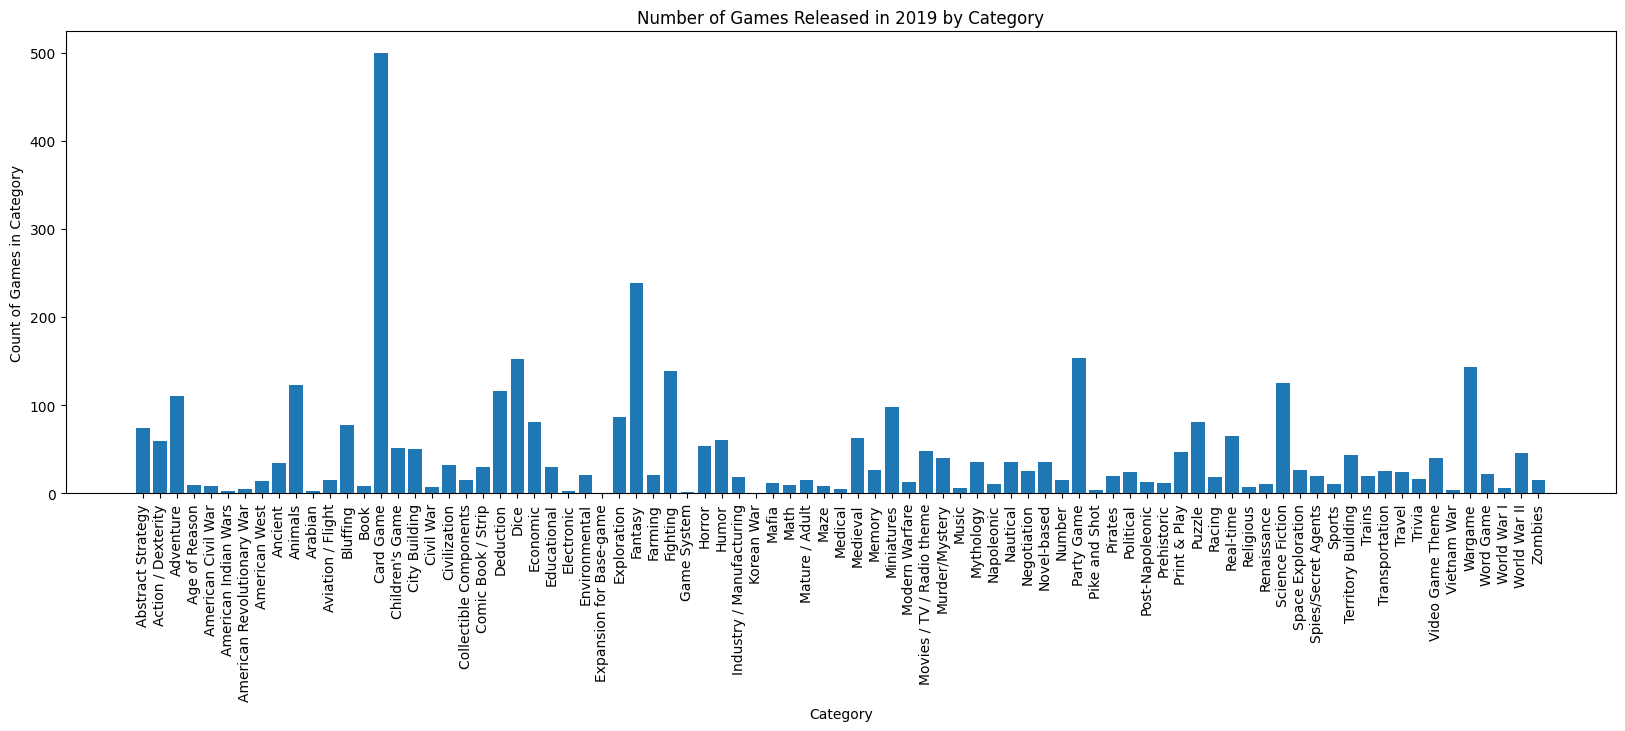

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


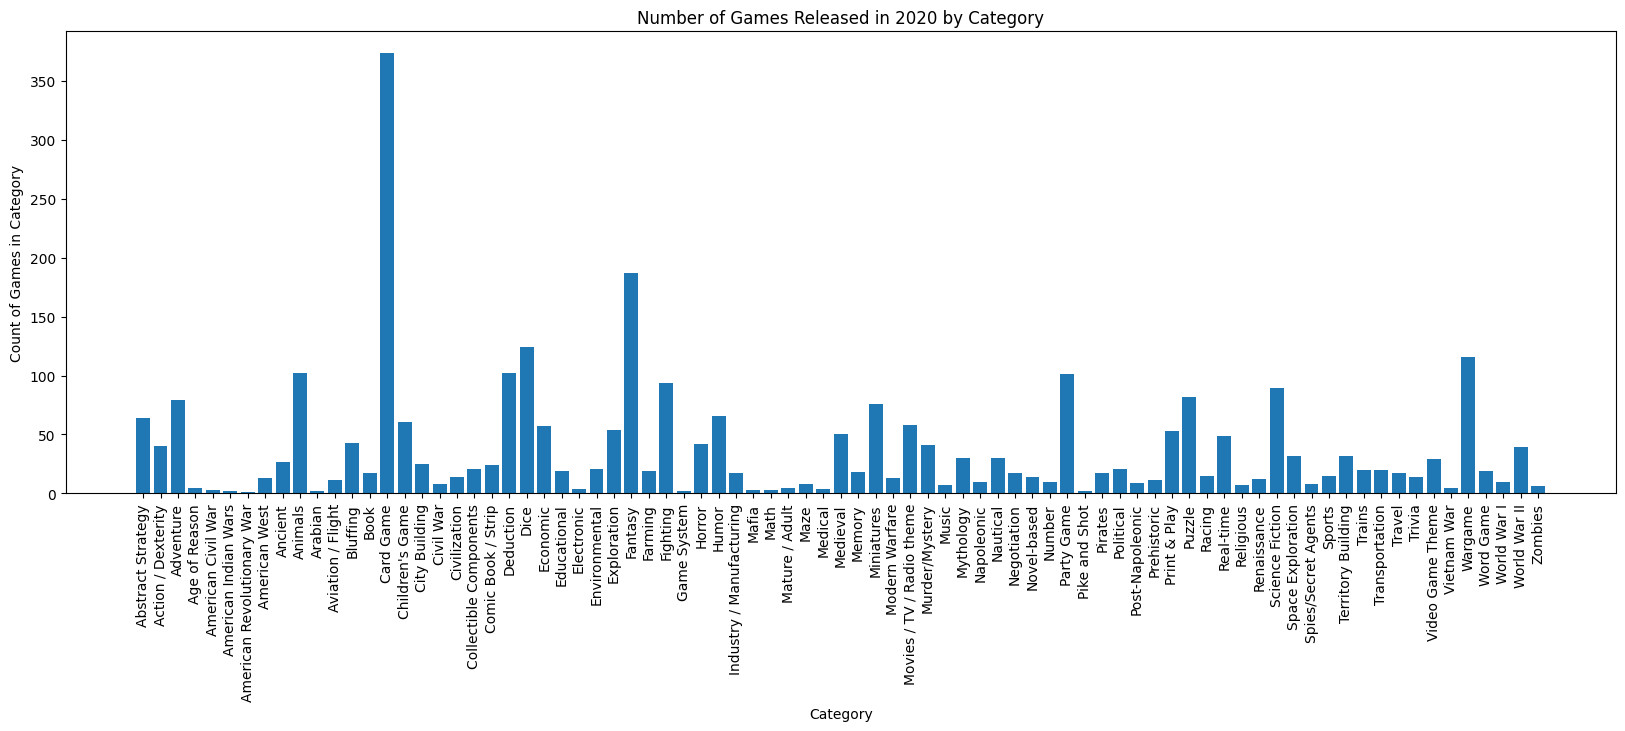

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


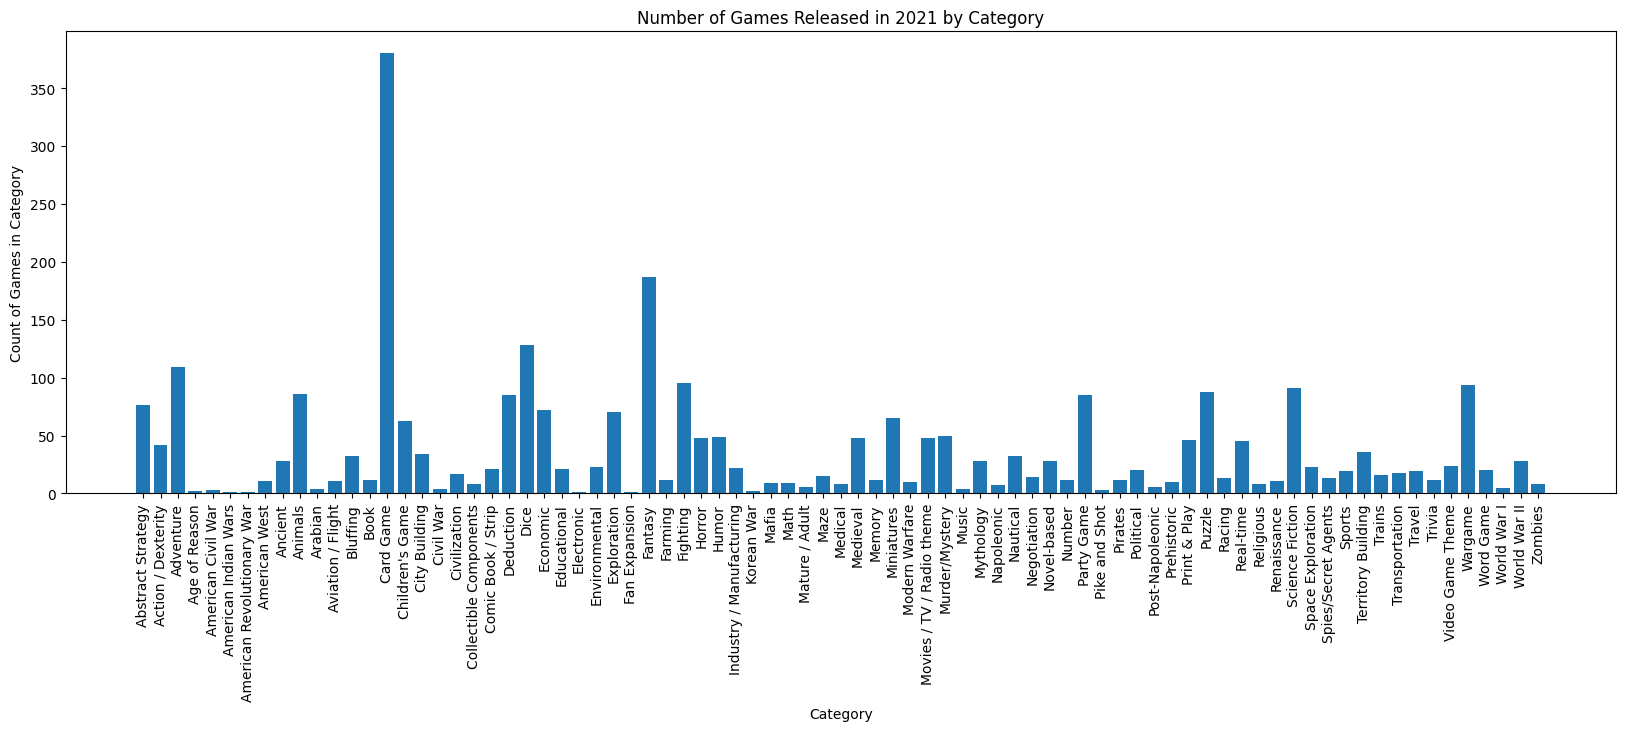

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


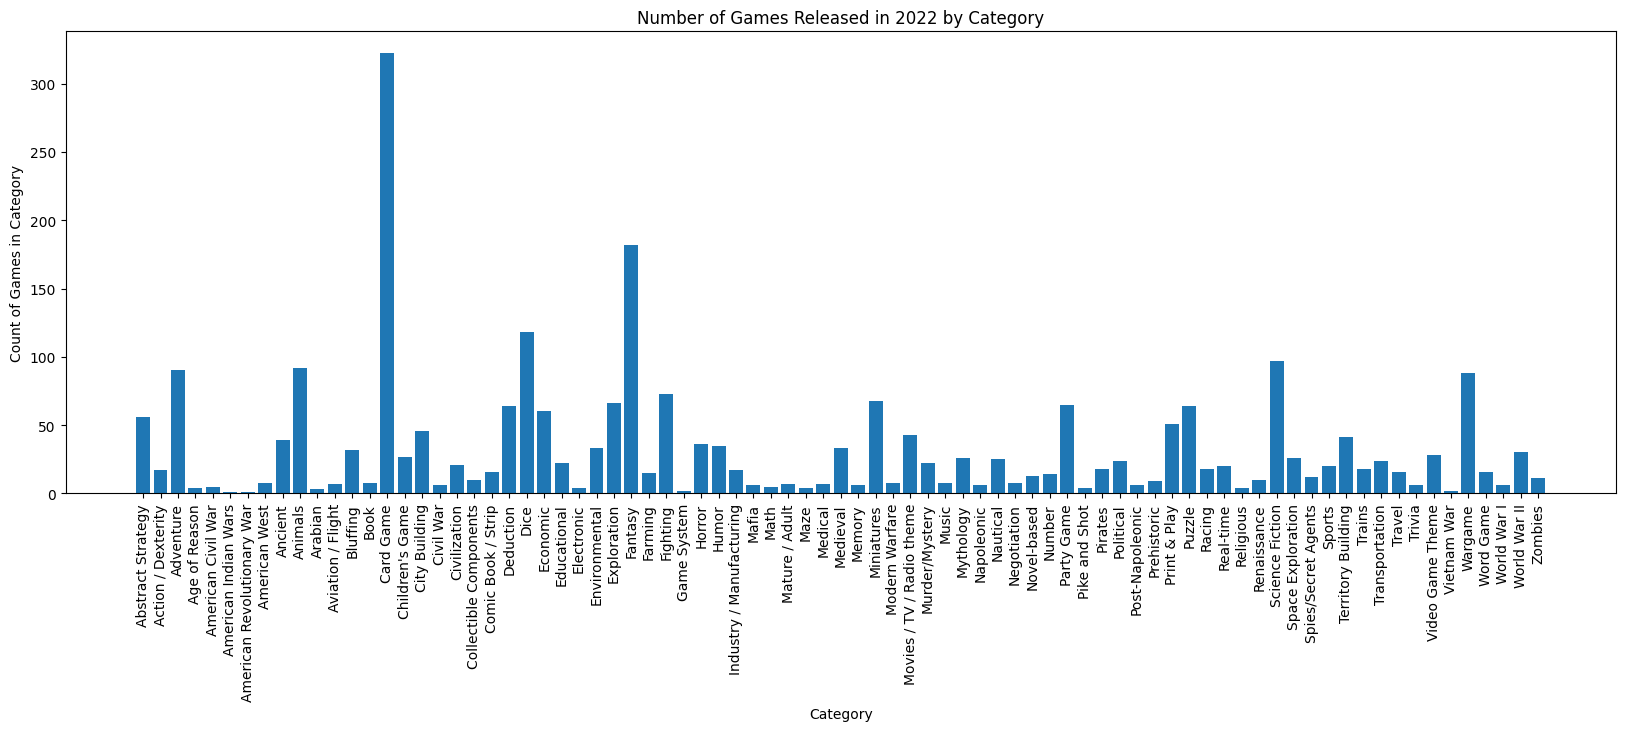

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


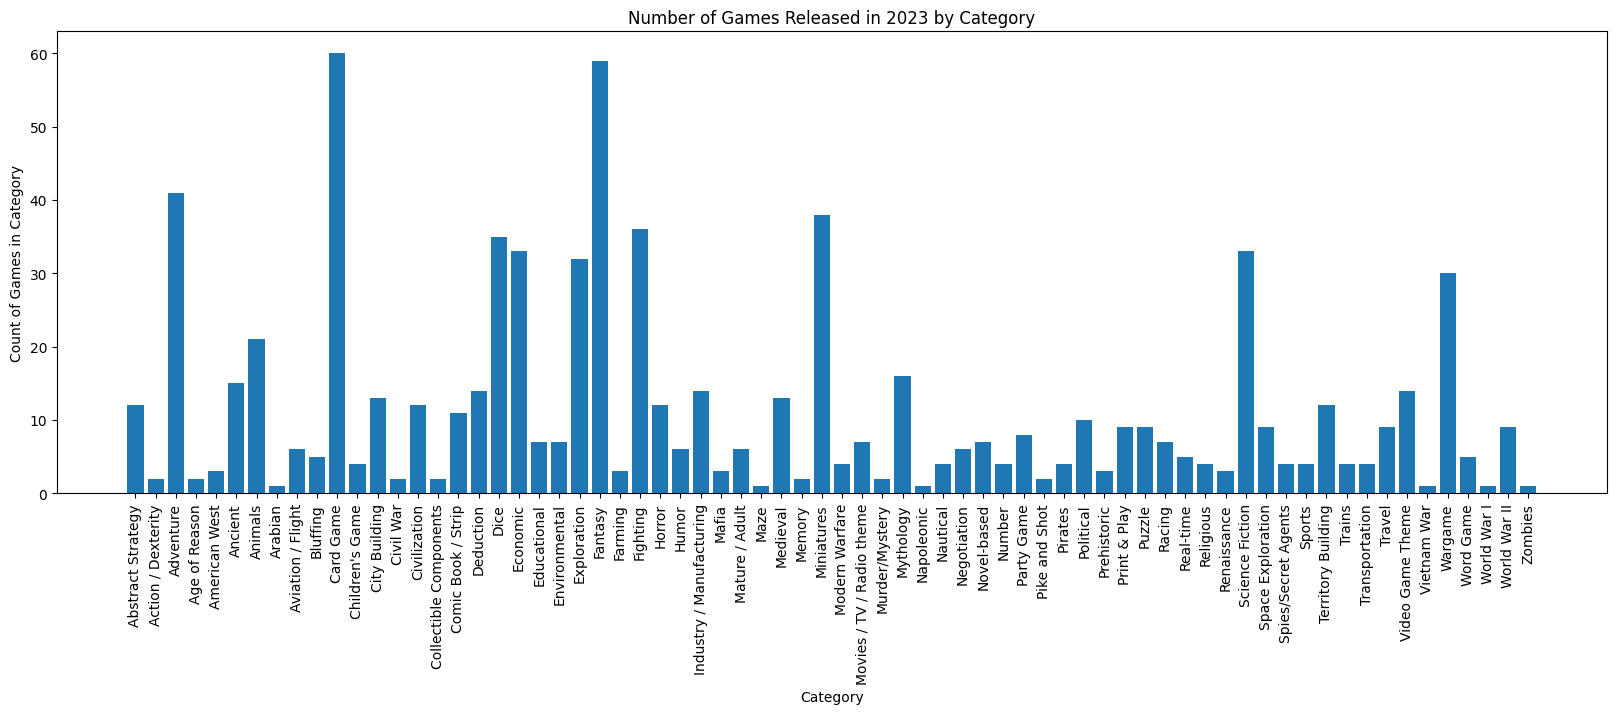

C:\Users\willm\AppData\Local\Temp\ipykernel_14684\2123732011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['category'], rotation=90, ha='center')


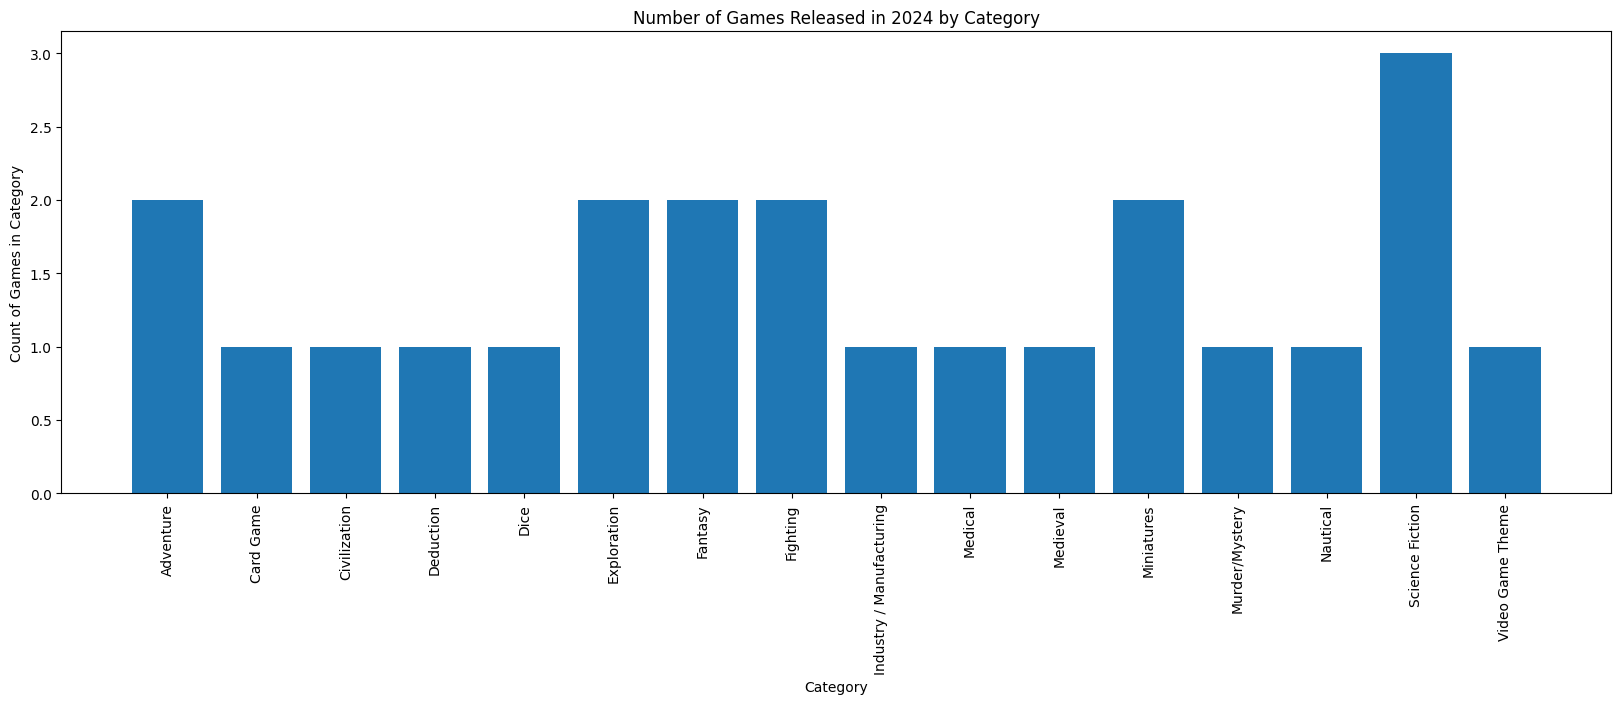

In [132]:
current_year = 2024
last_24_years = range(current_year - 10, current_year+1)

for year in last_24_years:
    df_year = df_filtered_grouped[df_filtered_grouped['year'] == year]

    fig, ax = plt.subplots(figsize=(20,6))

    ax.bar(df_year['category'], df_year['count'])
    ax.set_xticklabels(df_year['category'], rotation=90, ha='center')
    ax.set_xlabel('Category')
    ax.set_ylabel('Count of Games in Category')
    ax.set_title(f'Number of Games Released in {year} by Category')
    plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

        I did not expect "card games" to be such an enormous category. I suppose it makes sense, as it's easier to create card games than almost any other type of game.

2. Do you have any concerns about your dataset? 

        I'm a little concerned about the mixture of groups in "category". I am prioritizing different themes in this analysis. However there are many groups in category that I would not consider a theme, such as "card game". On the other hand, an "abstract strategy" game could absolutely be considered a theme, just the lack of one. (Abstract strategy games are things such as backgammon or chess. It means the rules are not meant to replicate any scenario or setting, but instead stand on their own.) I'll have to decide how to filter the dataset so that I'm not removing legitimate themes, but still able to see an accurate picture.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

        As I said for the last question, I need to create a list of "categories" to remove. 